In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("K:/Data Science Internship/WEEK 3/datasets/airbnb_ny_dataset.csv")

# View first 5 rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Shape of dataset
df.shape


(48895, 16)

In [12]:
# Column names
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
# Check missing values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values were observed only in review-related fields, which were not relevant to the pricing analysis. Therefore, no data imputation was necessary.

## Business Question
**Do Entire home/apt listings charge significantly higher prices than Private room listings?**

# Hypotheses

H₀ (Null): Mean price is the same for both room types

H₁ (Alternative): Entire home/apt listings have higher mean prices

In [17]:
# Keep only relevant columns
df_test = df[['price', 'room_type']]

# Filter room types
df_test = df_test[df_test['room_type'].isin(['Entire home/apt', 'Private room'])]

print(df_test)

       price        room_type
0        149     Private room
1        225  Entire home/apt
2        150     Private room
3         89  Entire home/apt
4         80  Entire home/apt
...      ...              ...
48889     65     Private room
48890     70     Private room
48891     40     Private room
48892    115  Entire home/apt
48894     90     Private room

[47735 rows x 2 columns]


In [18]:
df_test['room_type'].value_counts()


room_type
Entire home/apt    25409
Private room       22326
Name: count, dtype: int64

In [19]:
df_test.groupby('room_type')['price'].agg(['mean', 'median', 'std'])

,mean,median,std
room_type,,,
Entire home/apt,211.794246,160.0,284.041611
Private room,89.780973,70.0,160.205262


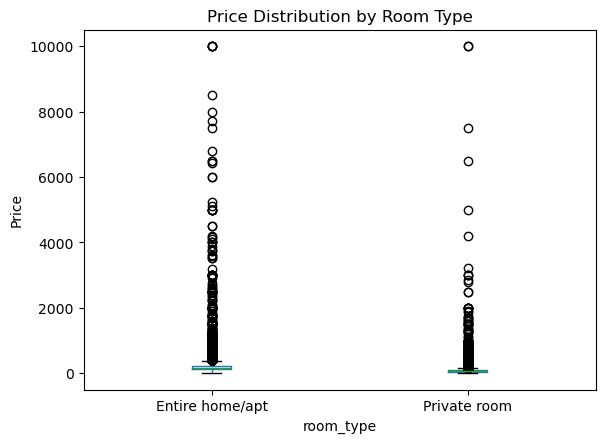

In [20]:
import matplotlib.pyplot as plt

df_test.boxplot(column='price', by='room_type', grid=False)
plt.title("Price Distribution by Room Type")
plt.suptitle("")
plt.ylabel("Price")
plt.show()


In [28]:
from scipy.stats import ttest_ind

alpha = 0.05

# Separate groups
entire_home = df_test[df_test['room_type'] == 'Entire home/apt']['price']
private_room = df_test[df_test['room_type'] == 'Private room']['price']

# Perform t-test (Welch's t-test)
t_stat, p_value = ttest_ind(entire_home, private_room, equal_var=False)

# Print results clearly
print("Independent Samples t-Test Results")
print("----------------------------------")
print(f"t-statistic : {t_stat:.4f}")
print(f"p-value     : {p_value:.6f}")

if p_value <= alpha:
    print("Decision    : Reject the null hypothesis")
    print("Conclusion  : Mean prices differ significantly between room types.")
else:
    print("Decision    : Fail to reject the null hypothesis")
    print("Conclusion  : No significant difference in mean prices.")


Independent Samples t-Test Results
----------------------------------
t-statistic : 58.6709
p-value     : 0.000000
Decision    : Reject the null hypothesis
Conclusion  : Mean prices differ significantly between room types.


t-Test Conclusion

The independent samples t-test revealed a statistically significant difference in mean prices between Entire home/apt and Private room listings (p < 0.05), leading to rejection of the null hypothesis.

# 2. Business Assumption

**Room type distribution depends on neighbourhood group.**

In simple terms:

“Certain neighbourhoods have significantly more entire homes or private rooms.”




# Hypotheses

Null Hypothesis (H₀)

Room type and neighbourhood group are independent.

Alternative Hypothesis (H₁)

Room type and neighbourhood group are associated.

In [26]:
# Create contingency table
contingency_table = pd.crosstab(
    df['neighbourhood_group'],
    df['room_type']
)

contingency_table


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [29]:
from scipy.stats import chi2_contingency

alpha = 0.05

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results clearly
print("\nChi-Square Test of Independence Results")
print("--------------------------------------")
print(f"Chi-square statistic : {chi2:.4f}")
print(f"Degrees of freedom   : {dof}")
print(f"p-value              : {p:.6f}")

if p <= alpha:
    print("Decision             : Reject the null hypothesis")
    print("Conclusion           : Room type and neighbourhood are significantly associated.")
else:
    print("Decision             : Fail to reject the null hypothesis")
    print("Conclusion           : No significant association between room type and neighbourhood.")



Chi-Square Test of Independence Results
--------------------------------------
Chi-square statistic : 1559.5803
Degrees of freedom   : 8
p-value              : 0.000000
Decision             : Reject the null hypothesis
Conclusion           : Room type and neighbourhood are significantly associated.


Chi-Square Conclusion

The Chi-Square test of independence indicated a significant association between room type and neighbourhood group (χ² = 1559.58, p < 0.05), resulting in rejection of the null hypothesis.

# 3. Business Problem 
This study tests whether there is a statistically significant difference in the mean prices of Private room and Shared room Airbnb listings in New York City using an independent samples t-test.

# Hypotheses Formulation

Null Hypothesis (H₀)

There is no significant difference in the mean prices of Private room listings with low and high minimum-night requirements..

Alternative Hypothesis (H₁)

There is a significant difference in the mean prices.

In [33]:
from scipy.stats import ttest_ind

alpha = 0.05

# Filter private rooms only
private_df = df[df['room_type'] == 'Private room']

# Create two similar groups
low_min = private_df[private_df['minimum_nights'] <= 3]['price']
high_min = private_df[private_df['minimum_nights'] > 3]['price']

# Remove invalid prices
low_min = low_min[low_min > 0]
high_min = high_min[high_min > 0]

# Perform t-test
t_stat, p_value = ttest_ind(low_min, high_min, equal_var=False)

print("Independent Samples t-Test Results")
print("----------------------------------")
print(f"t-statistic : {t_stat:.4f}")
print(f"p-value     : {p_value:.6f}")

if p_value <= alpha:
    print("Decision    : Reject the null hypothesis")
else:
    print("Decision    : Fail to reject the null hypothesis")
    print("Conclusion  : No significant difference in mean prices between the two groups.")


Independent Samples t-Test Results
----------------------------------
t-statistic : 1.6834
p-value     : 0.092341
Decision    : Fail to reject the null hypothesis
Conclusion  : No significant difference in mean prices between the two groups.


The independent samples t-test indicated no statistically significant difference in mean prices between the two Private room groups (p > 0.05); therefore, the null hypothesis was not rejected.